In [29]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [31]:
def load_data(path='./test-1.csv'):
    data = pd.read_csv(path)
    return data

test = load_data()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


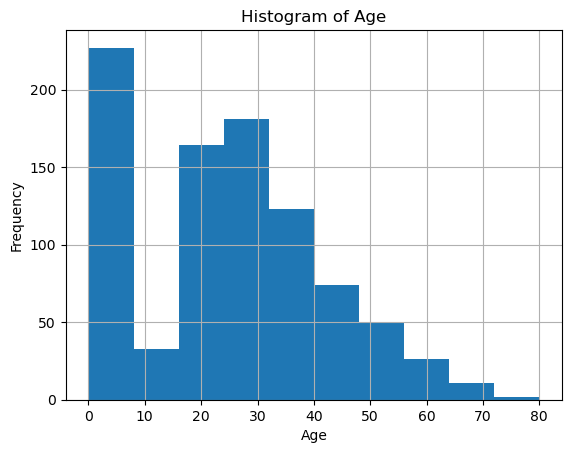

In [32]:
def show_histogram(data):
    data['Age'].hist()
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.title('Histogram of Age')
    plt.show()

show_histogram(test)

In [7]:
test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Mean Squared Error: 1554.2993045783344


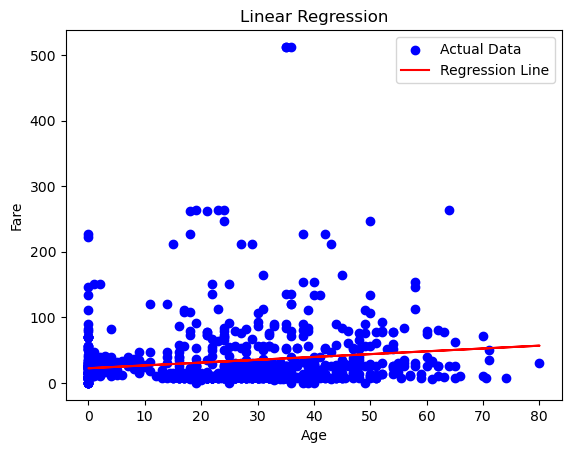

In [33]:
def linear_model_train_test(data):
    data.fillna(0, inplace=True)
    train_df, test_df = train_test_split(test, test_size=0.2, random_state=42)

    train_x = train_df['Age'].values.reshape(train_df.shape[0], 1)
    train_y = train_df['Fare'].values.reshape(train_df.shape[0], 1)
    test_x = test_df['Age'].values.reshape(test_df.shape[0], 1)
    test_y = test_df['Fare'].values.reshape(test_df.shape[0], 1)
    model = LinearRegression()
    model.fit(train_x, train_y)

    pred_y = model.predict(test_x)
    mse = mean_squared_error(test_y, pred_y)
    print(f"Mean Squared Error: {mse}")

    X = data['Age'].values.reshape(data.shape[0], 1)
    Y = data['Fare'].values.reshape(data.shape[0], 1)
    plt.scatter(X, Y, color='blue', label='Actual Data')
    plt.plot(X, model.predict(X), color='red', label='Regression Line')
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.title('Linear Regression')
    plt.legend()
    plt.show()

linear_model_train_test(test)
